## Import The Modules

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load the Dataset

In [86]:
df = pd.read_csv('Train.csv')
df.head()

Item_Identifier 
 Item_Weight 
 Item_Fat_Content 
 Item_Visibility 
 Item_Type 
 Item_MRP 
 Outlet_Identifier 
 Outlet_Establishment_Year 
 Outlet_Size 
 Outlet_Location_Type 
 Outlet_Type 
 Item_Outlet_Sales 
 
 
 
 
 0 
 FDA15 
 9.30 
 Low Fat 
 0.016047 
 Dairy 
 249.8092 
 OUT049 
 1999 
 Medium 
 Tier 1 
 Supermarket Type1 
 3735.1380 
 
 
 1 
 DRC01 
 5.92 
 Regular 
 0.019278 
 Soft Drinks 
 48.2692 
 OUT018 
 2009 
 Medium 
 Tier 3 
 Supermarket Type2 
 443.4228 
 
 
 2 
 FDN15 
 17.50 
 Low Fat 
 0.016760 
 Meat 
 141.6180 
 OUT049 
 1999 
 Medium 
 Tier 1 
 Supermarket Type1 
 2097.2700 
 
 
 3 
 FDX07 
 19.20 
 Regular 
 0.000000 
 Fruits and Vegetables 
 182.0950 
 OUT010 
 1998 
 NaN 
 Tier 3 
 Grocery Store 
 732.3800 
 
 
 4 
 NCD19 
 8.93 
 Low Fat 
 0.000000 
 Household 
 53.8614 
 OUT013 
 1987 
 High 
 Tier 3 
 Supermarket Type1 
 994.7052

In [87]:
# stats info
df.describe()

Item_Weight 
 Item_Visibility 
 Item_MRP 
 Outlet_Establishment_Year 
 Item_Outlet_Sales 
 
 
 
 
 count 
 7060.000000 
 8523.000000 
 8523.000000 
 8523.000000 
 8523.000000 
 
 
 mean 
 12.857645 
 0.066132 
 140.992782 
 1997.831867 
 2181.288914 
 
 
 std 
 4.643456 
 0.051598 
 62.275067 
 8.371760 
 1706.499616 
 
 
 min 
 4.555000 
 0.000000 
 31.290000 
 1985.000000 
 33.290000 
 
 
 25% 
 8.773750 
 0.026989 
 93.826500 
 1987.000000 
 834.247400 
 
 
 50% 
 12.600000 
 0.053931 
 143.012800 
 1999.000000 
 1794.331000 
 
 
 75% 
 16.850000 
 0.094585 
 185.643700 
 2004.000000 
 3101.296400 
 
 
 max 
 21.350000 
 0.328391 
 266.888400 
 2009.000000 
 13086.964800

In [88]:
#attribute datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [89]:
#check unique value in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing the Data

In [90]:
#check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [91]:
#check for categrical or object type
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [92]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [93]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [94]:
#fill the missing values
    #we are using the mean value of Item Identifier to fill Item-weight
item_weight_mean = df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight_mean

Item_Weight 
 
 
 Item_Identifier 
 
 
 
 
 
 DRA12 
 11.600 
 
 
 DRA24 
 19.350 
 
 
 DRA59 
 8.270 
 
 
 DRB01 
 7.390 
 
 
 DRB13 
 6.115 
 
 
 ... 
 ... 
 
 
 NCZ30 
 6.590 
 
 
 NCZ41 
 19.850 
 
 
 NCZ42 
 10.500 
 
 
 NCZ53 
 9.600 
 
 
 NCZ54 
 14.650 
 
 
 
 1555 rows × 1 columns

In [95]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [96]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [97]:
df['Item_Weight'].isnull().sum()

0

In [98]:
outlet_size_mode = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type 
 Grocery Store 
 Supermarket Type1 
 Supermarket Type2 
 Supermarket Type3 
 
 
 
 
 Outlet_Size 
 Small 
 Small 
 Medium 
 Medium

In [99]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [100]:
df['Outlet_Size'].isnull().sum()

0

In [101]:
sum(df['Item_Visibility']==0)

526

In [102]:
#replace zeroes with mean
df.loc[:, 'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [103]:
sum(df['Item_Visibility']==0)

0

In [104]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Creating New Attributes

In [105]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x:x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [106]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [107]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts() 

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [108]:
#create small values for estabished year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

## EDA

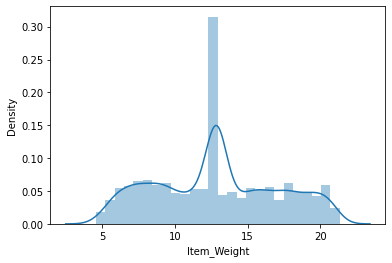

In [109]:
sns.distplot(df['Item_Weight'])

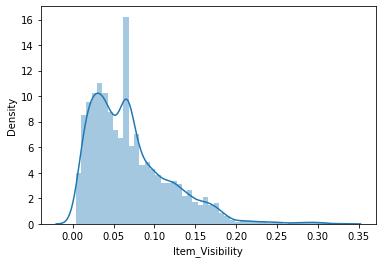

In [110]:
sns.distplot(df['Item_Visibility'])

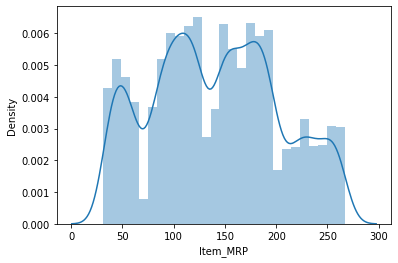

In [111]:
sns.distplot(df['Item_MRP'])

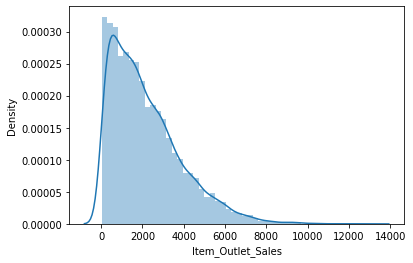

In [112]:
sns.distplot(df['Item_Outlet_Sales'])

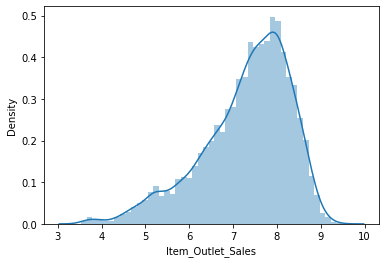

In [113]:
# log Transformation
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales']+1)
sns.distplot(df['Item_Outlet_Sales'])

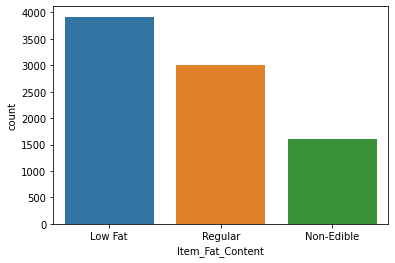

In [114]:
sns.countplot(df['Item_Fat_Content'])

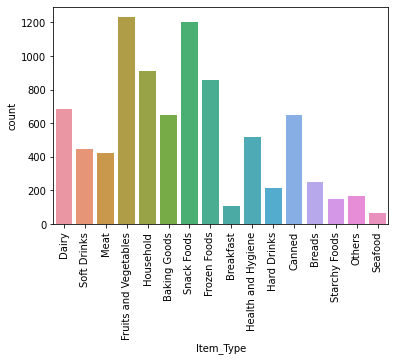

In [115]:
# plt.figure(figsize=(15,5))
label = list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=label,rotation=90)

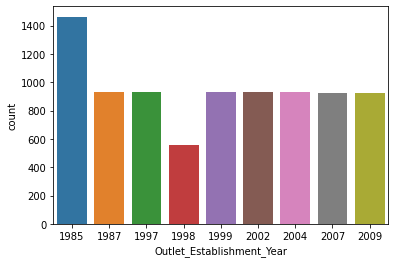

In [116]:
sns.countplot(df['Outlet_Establishment_Year'])

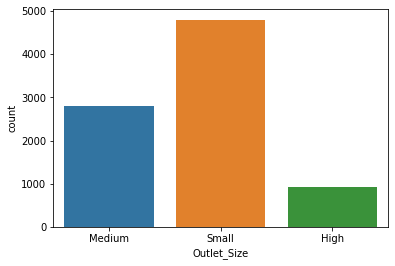

In [117]:
sns.countplot(df['Outlet_Size'])

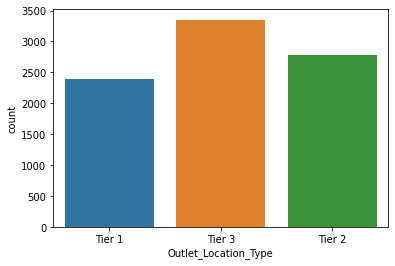

In [118]:
sns.countplot(df['Outlet_Location_Type'])

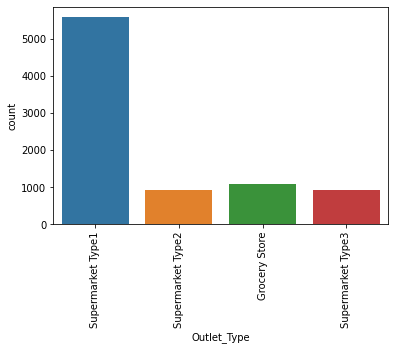

In [119]:
label = list(df['Outlet_Type'].unique())
sns.countplot(df['Outlet_Type']).set_xticklabels(labels =label,rotation=90)

## Coorelational Matrix

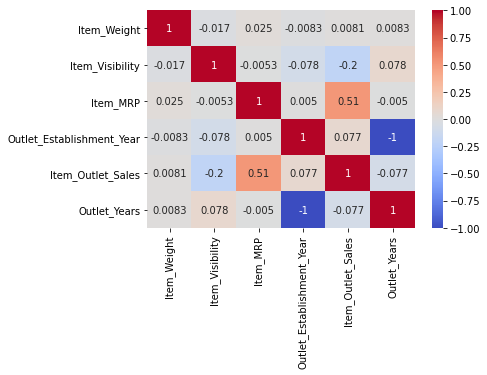

In [120]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Label Encoding

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [122]:
df.head()

Item_Identifier 
 Item_Weight 
 Item_Fat_Content 
 Item_Visibility 
 Item_Type 
 Item_MRP 
 Outlet_Identifier 
 Outlet_Establishment_Year 
 Outlet_Size 
 Outlet_Location_Type 
 Outlet_Type 
 Item_Outlet_Sales 
 New_Item_Type 
 Outlet_Years 
 Outlet 
 
 
 
 
 0 
 FDA15 
 9.30 
 0 
 0.016047 
 4 
 249.8092 
 OUT049 
 1999 
 1 
 0 
 1 
 8.225808 
 1 
 14 
 9 
 
 
 1 
 DRC01 
 5.92 
 2 
 0.019278 
 14 
 48.2692 
 OUT018 
 2009 
 1 
 2 
 2 
 6.096776 
 0 
 4 
 3 
 
 
 2 
 FDN15 
 17.50 
 0 
 0.016760 
 10 
 141.6180 
 OUT049 
 1999 
 1 
 0 
 1 
 7.648868 
 1 
 14 
 9 
 
 
 3 
 FDX07 
 19.20 
 2 
 0.066132 
 6 
 182.0950 
 OUT010 
 1998 
 2 
 2 
 0 
 6.597664 
 1 
 15 
 0 
 
 
 4 
 NCD19 
 8.93 
 1 
 0.066132 
 9 
 53.8614 
 OUT013 
 1987 
 0 
 2 
 1 
 6.903451 
 2 
 26 
 1

## One Hot Encoding

In [123]:
df = pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','New_Item_Type','Outlet_Type'])
df.head()

Item_Identifier 
 Item_Weight 
 Item_Visibility 
 Item_Type 
 Item_MRP 
 Outlet_Identifier 
 Outlet_Establishment_Year 
 Item_Outlet_Sales 
 Outlet_Years 
 Outlet 
 ... 
 Outlet_Location_Type_0 
 Outlet_Location_Type_1 
 Outlet_Location_Type_2 
 New_Item_Type_0 
 New_Item_Type_1 
 New_Item_Type_2 
 Outlet_Type_0 
 Outlet_Type_1 
 Outlet_Type_2 
 Outlet_Type_3 
 
 
 
 
 0 
 FDA15 
 9.30 
 0.016047 
 4 
 249.8092 
 OUT049 
 1999 
 8.225808 
 14 
 9 
 ... 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 1 
 DRC01 
 5.92 
 0.019278 
 14 
 48.2692 
 OUT018 
 2009 
 6.096776 
 4 
 3 
 ... 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 2 
 FDN15 
 17.50 
 0.016760 
 10 
 141.6180 
 OUT049 
 1999 
 7.648868 
 14 
 9 
 ... 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 3 
 FDX07 
 19.20 
 0.066132 
 6 
 182.0950 
 OUT010 
 1998 
 6.597664 
 15 
 0 
 ... 
 0 
 0 
 1 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 NCD19 
 8.93 
 0.066132 
 9 
 53.8614 
 OUT013 
 1987 
 6.903451 
 26 
 1 
 ... 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 
 5 rows × 26 columns

## Input Split

In [124]:
X = df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

## Model Training

In [125]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

def train(model,X,y):
    model.fit(X,y)
    pred = model.predict(X)

    cv_score = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score",cv_score)

Model Report
MSE: 0.2880065032501795
CV Score 0.2891182742641596


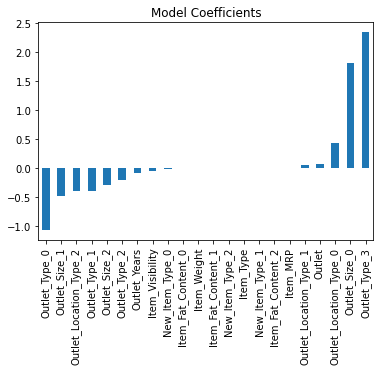

In [126]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 0.42802985605683486
CV Score 0.4289289251562643


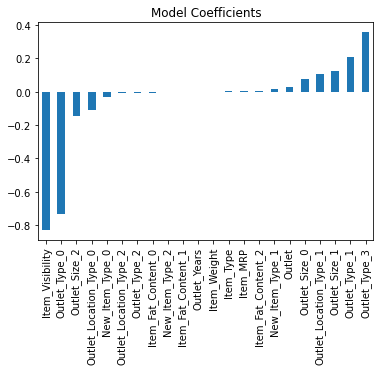

In [127]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 0.7628688679102087
CV Score 0.7630789166281843


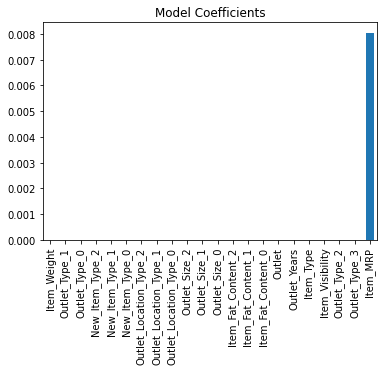

In [128]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
MSE: 2.7767015319289398e-34
CV Score 0.5788631716771597


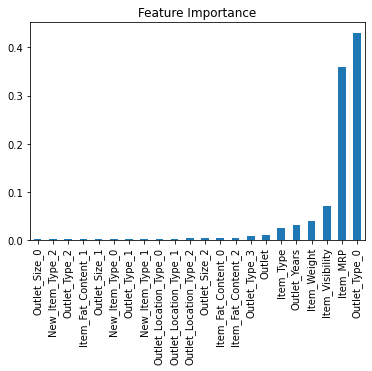

In [129]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

Model Report
MSE: 0.04303308085507662
CV Score 0.3101493523232526


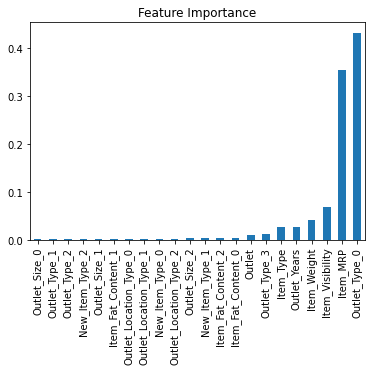

In [131]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')

Model Report
MSE: 1.0418489584965893e-28
CV Score 0.33193922469563075


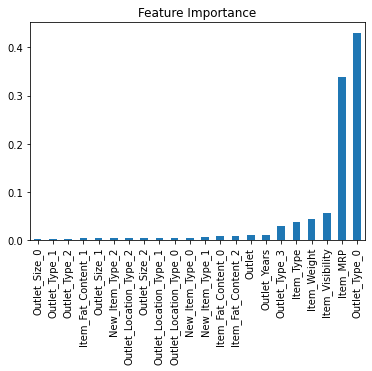

In [132]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_,X.columns).sort_values()
coef.plot(kind='bar',title='Feature Importance')